### Question 1: Do RA and Dec of Cygnus A change with time?

We compare J2000 coordinates of Cygnus A with present-epoch coordinates using Astropy.


**What the code does:**
- Defines the J2000 Right Ascension and Declination of Cygnus A in the FK5 frame
- Specifies the reference equinox as J2000.0
- Transforms the coordinates to the FK5 frame at the current equinox
- Computes the updated RA and Dec accounting for Earth’s precession
- Allows comparison between J2000 and present-epoch coordinates

In [4]:
from astropy.coordinates import SkyCoord, FK5
from astropy.time import Time
import astropy.units as u

# J2000 coordinates in FK5 frame
cygA_fk5_j2000 = SkyCoord(
    ra=19*u.hour + 59*u.minute + 28.3566*u.second,
    dec=40*u.deg + 44*u.arcmin + 2.096*u.arcsec,
    frame=FK5(equinox=Time("J2000"))
)

# Transform to current equinox
cygA_fk5_now = cygA_fk5_j2000.transform_to(
    FK5(equinox=Time.now())
)

cygA_fk5_j2000, cygA_fk5_now

(<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
     (299.8681525, 40.73391556)>,
 <SkyCoord (FK5: equinox=2026-01-16 11:25:35.274947): (ra, dec) in deg
     (300.09354275, 40.80636264)>)

In [2]:
!pip install astropy


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'C:\\Python312\\Scripts\\fits2bitmap.exe' -> 'C:\\Python312\\Scripts\\fits2bitmap.exe.deleteme'


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/6.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.4 MB 1.9 MB/s eta 0:00:04
   - -------------------------------------- 0.2/6.4 MB 3.3 MB/s eta 0:00:02
   ----- ---------------------------------- 0.9/6.4 MB 9.0 MB/s eta 0:00:01
   ---------- ----------------------------- 1.6/6.4 MB 11.5 MB/s eta 0:00:01
   -------------- ------------------------- 2.3/6.4 MB 12.4 MB/s eta 0:00:01
   ----------------- ---------------------- 2.8/6.4 MB 11.9 MB/s eta 0:00:01
   -------------------- ------------------- 3.2/6.4 MB 12.0 MB/s eta 0:00:01
   ------------------------- -------------- 4.1/6.4 MB 13.0 MB/s eta 0:00:01
   ------------------------------ --------- 4.8/6.4 MB 12.9 MB/s eta 0:00:01
   ----------------------------------- ---- 5.6/6.4 MB 13.7 MB/s eta 0:00:01
   ----------------------------------- ---- 5.6/6.4 MB 13.7 MB/s eta 0:00:01
   ----------------------------------- ---- 5.7/6.4 MB 10.9 MB/s eta 0:00:01
   ------

### Question 2: Azimuth and Elevation from IIT Kanpur

**What the code does:**
- Imports required Astropy classes for coordinate transformation
- Defines the geographic location of IIT Kanpur using latitude, longitude, and height
- Sets the observation time to the current time
- Creates a local AltAz (Azimuth–Altitude) reference frame for the observer
- Transforms the equatorial coordinates of Cygnus A into the AltAz frame
- Outputs the azimuth and elevation of Cygnus A as seen from IIT Kanpur


In [5]:
from astropy.coordinates import EarthLocation, AltAz
import numpy as np

iitk = EarthLocation(lat=26.5123, lon=80.2329, height=142)
obs_time = Time.now()

altaz = AltAz(obstime=obs_time, location=iitk)
cygA_altaz = cygA_j2000.transform_to(altaz)

cygA_altaz.az, cygA_altaz.alt


(<Longitude 303.19163905 deg>, <Latitude 32.74599883 deg>)

### Question 3: Polar plot of Azimuth–Elevation

**What the code does:**
- Defines a time range covering 24 hours from the chosen observation time
- Converts the RA–Dec coordinates of Cygnus A to Azimuth–Elevation coordinates at each time step
- Extracts azimuth and elevation values from the transformed coordinates
- Creates a polar plot with azimuth as the angular coordinate
- Uses elevation as the radial coordinate
- Plots the apparent daily path of Cygnus A in the local sky of IIT Kanpur


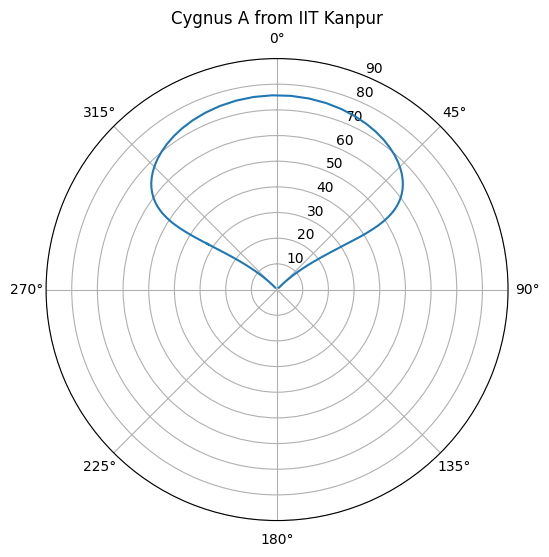

In [8]:
import matplotlib.pyplot as plt

times = obs_time + np.linspace(0,24,200)*u.hour
altaz_track = cygA_j2000.transform_to(AltAz(obstime=times, location=iitk))

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.plot(altaz_track.az.radian, altaz_track.alt.degree)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rlim(0,90)
ax.set_title("Cygnus A from IIT Kanpur")
plt.show()


In [7]:
!pip install matplotlib

     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ------- -------------------------------- 10.2/52.8 kB ? eta -:--:--
     ---------------------- --------------- 30.7/52.8 kB 435.7 kB/s eta 0:00:01
     ------------------------------------ - 51.2/52.8 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 52.8/52.8 kB 387.2 kB/s eta 0:00:00
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.2/8.1 MB 4.8 MB/s eta 0:00:02
   -- ------------------------------------- 0.4/8.1 MB 5.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.6/8.1 MB 4.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/8.1 MB 5.3 MB/s eta 0:00:02
   -------- ------------------------------- 1.8/8.1 MB 7.5 MB/s eta 0:00:01
   ------------ -----------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Question 4: Sun vs Cygnus A RA–Dec over a year

**What the code does:**
- Generates a sequence of dates covering one full year
- Computes the Sun’s Right Ascension and Declination for each date
- Uses the fixed J2000 coordinates of Cygnus A for comparison
- Plots the Sun’s RA variation over the year
- Plots the Sun’s Declination variation over the year
- Overlays Cygnus A’s RA and Dec as constant reference lines
- Highlights the contrast between a moving solar system object and a distant extragalactic source


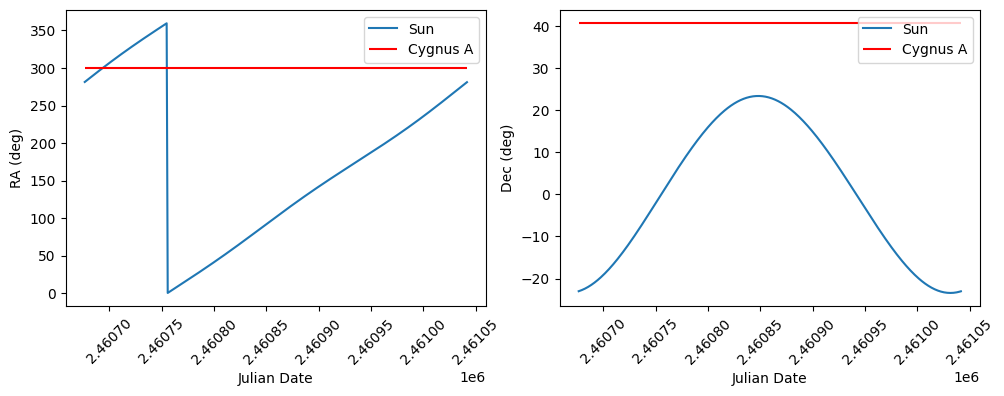

In [ ]:
from astropy.coordinates import get_sun

dates = Time("2025-01-01") + np.linspace(0,365,365)*u.day
sun = get_sun(dates)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(dates.jd, sun.ra.degree, label="Sun")
plt.hlines(cygA_j2000.ra.degree, dates.jd[0], dates.jd[-1], colors="r", label="Cygnus A")
plt.xlabel("Julian Date")
plt.ylabel("RA (deg)")
plt.legend()
plt.xticks(rotation=45)


plt.subplot(1,2,2)
plt.plot(dates.jd, sun.dec.degree, label="Sun")
plt.hlines(cygA_j2000.dec.degree, dates.jd[0], dates.jd[-1], colors="r", label="Cygnus A")
plt.xlabel("Julian Date")
plt.ylabel("Dec (deg)")
plt.legend()

plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

